In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_excel('energia.xlsx', index_col=0)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.rename(columns={"Data":"date", "Krajowe zapotrzebowanie na moc":"demand"}, inplace=True)
df.astype({"date": 'datetime64[ns]'})

,date,demand
0,2009-01-01 00:00:00,15268.288
1,2009-01-01 01:00:00,14552.238
2,2009-01-01 02:00:00,13854.500
3,2009-01-01 03:00:00,13319.188
4,2009-01-01 04:00:00,13006.675
...,...,...
35055,2012-12-31 19:00:00,18219.738
35056,2012-12-31 20:00:00,17057.738
35057,2012-12-31 21:00:00,16371.363
35058,2012-12-31 22:00:00,15970.113


# Daty

In [24]:
df['h'] = df.date.dt.hour
df['m'] = df.date.dt.month
df['d'] = df.date.dt.day
df['y'] = df.date.dt.year
df['wd'] = df.date.dt.weekday

In [25]:
df

,date,demand,h,m,d,y,wd
0,2009-01-01 00:00:00,15268.288,0,1,1,2009,3
1,2009-01-01 01:00:00,14552.238,1,1,1,2009,3
2,2009-01-01 02:00:00,13854.500,2,1,1,2009,3
3,2009-01-01 03:00:00,13319.188,3,1,1,2009,3
4,2009-01-01 04:00:00,13006.675,4,1,1,2009,3
...,...,...,...,...,...,...,...
35055,2012-12-31 19:00:00,18219.738,19,12,31,2012,0
35056,2012-12-31 20:00:00,17057.738,20,12,31,2012,0
35057,2012-12-31 21:00:00,16371.363,21,12,31,2012,0
35058,2012-12-31 22:00:00,15970.113,22,12,31,2012,0


Weekday w tej metodzie: 0=poniedziałek

# Merge pkb

In [26]:
pkb = pd.read_excel('pkb z opisem.xlsx', index_col=None)
pkbcol = pkb.columns
new_pkbcol = ['y','pkb','inflation','pop_growth','tax_in',
                           'poor_rate','child_avg','export','goods_out','ddc',
                           'gini_idx','articles','teleinf_export','listed_comps',
                          'credit_priv','receive_priv','savings']
pkb.columns = new_pkbcol

## Zamiana uszkodzonej komórki
Zamiast 27.969.55 wstawić 27.96955!

In [31]:
pkb.loc[3,'articles'] = 27.96955

In [32]:
pkb

,y,pkb,inflation,pop_growth,tax_in,poor_rate,child_avg,export,goods_out,ddc,gini_idx,articles,teleinf_export,listed_comps,credit_priv,receive_priv,savings
0,2009,434.7962,97.48,0.07,15.93,17.6,1.40,240.12,-0.86,40.26,33.4,23.84979,9.37,470,47.03,5.63,19.72
1,2010,479.3215,100.00,-0.29,16.55,17.7,1.41,275.76,-2.00,40.23,33.2,24.75355,9.63,570,48.75,8.22,19.32
2,2011,528.8322,104.24,0.05,16.69,17.1,1.33,295.33,-1.96,40.72,33.2,25.73496,7.04,757,51.39,12.84,20.48
3,2012,500.3608,107.95,0.00,15.96,17.3,1.33,307.37,-0.44,41.28,33.0,27.96955,7.04,844,50.10,1.27,20.55


In [33]:
df = df.merge(pkb, on='y')

# Cofniety szereg

In [34]:
temp = df[["date","demand"]]

In [35]:
for i in range(1,4):
    col = f"date_min{i}"
    df[col] = df.date - pd.DateOffset(days=i)
    df = df.merge(temp, how='left', left_on=col, right_on="date", suffixes=["",f"_d-{i}"])
    df = df.drop([col, f"date_d-{i}"], axis=1)


In [36]:
df

,date,demand,h,m,d,y,wd,pkb,inflation,pop_growth,...,gini_idx,articles,teleinf_export,listed_comps,credit_priv,receive_priv,savings,demand_d-1,demand_d-2,demand_d-3
0,2009-01-01 00:00:00,15268.288,0,1,1,2009,3,434.7962,97.48,0.07,...,33.4,23.84979,9.37,470,47.03,5.63,19.72,NaN,NaN,NaN
1,2009-01-01 01:00:00,14552.238,1,1,1,2009,3,434.7962,97.48,0.07,...,33.4,23.84979,9.37,470,47.03,5.63,19.72,NaN,NaN,NaN
2,2009-01-01 02:00:00,13854.500,2,1,1,2009,3,434.7962,97.48,0.07,...,33.4,23.84979,9.37,470,47.03,5.63,19.72,NaN,NaN,NaN
3,2009-01-01 03:00:00,13319.188,3,1,1,2009,3,434.7962,97.48,0.07,...,33.4,23.84979,9.37,470,47.03,5.63,19.72,NaN,NaN,NaN
4,2009-01-01 04:00:00,13006.675,4,1,1,2009,3,434.7962,97.48,0.07,...,33.4,23.84979,9.37,470,47.03,5.63,19.72,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35055,2012-12-31 19:00:00,18219.738,19,12,31,2012,0,500.3608,107.95,0.00,...,33.0,27.96955,7.04,844,50.10,1.27,20.55,18776.313,19842.000,20780.413
35056,2012-12-31 20:00:00,17057.738,20,12,31,2012,0,500.3608,107.95,0.00,...,33.0,27.96955,7.04,844,50.10,1.27,20.55,18253.825,19312.963,20179.575
35057,2012-12-31 21:00:00,16371.363,21,12,31,2012,0,500.3608,107.95,0.00,...,33.0,27.96955,7.04,844,50.10,1.27,20.55,17437.588,18310.163,19210.463
35058,2012-12-31 22:00:00,15970.113,22,12,31,2012,0,500.3608,107.95,0.00,...,33.0,27.96955,7.04,844,50.10,1.27,20.55,16409.150,17291.850,18036.963


# Month/year avg

In [37]:
df= df.merge(df.groupby('y').mean(numeric_only=True).demand, on='y', suffixes=['','_avgy'])
df= df.merge(df.groupby(['y','m']).mean(numeric_only=True).demand, on=['y','m'], suffixes=['','_avgm'])

In [38]:
df

,date,demand,h,m,d,y,wd,pkb,inflation,pop_growth,...,teleinf_export,listed_comps,credit_priv,receive_priv,savings,demand_d-1,demand_d-2,demand_d-3,demand_avgy,demand_avgm
0,2009-01-01 00:00:00,15268.288,0,1,1,2009,3,434.7962,97.48,0.07,...,9.37,470,47.03,5.63,19.72,NaN,NaN,NaN,16979.334244,18938.546785
1,2009-01-01 01:00:00,14552.238,1,1,1,2009,3,434.7962,97.48,0.07,...,9.37,470,47.03,5.63,19.72,NaN,NaN,NaN,16979.334244,18938.546785
2,2009-01-01 02:00:00,13854.500,2,1,1,2009,3,434.7962,97.48,0.07,...,9.37,470,47.03,5.63,19.72,NaN,NaN,NaN,16979.334244,18938.546785
3,2009-01-01 03:00:00,13319.188,3,1,1,2009,3,434.7962,97.48,0.07,...,9.37,470,47.03,5.63,19.72,NaN,NaN,NaN,16979.334244,18938.546785
4,2009-01-01 04:00:00,13006.675,4,1,1,2009,3,434.7962,97.48,0.07,...,9.37,470,47.03,5.63,19.72,NaN,NaN,NaN,16979.334244,18938.546785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35055,2012-12-31 19:00:00,18219.738,19,12,31,2012,0,500.3608,107.95,0.00,...,7.04,844,50.10,1.27,20.55,18776.313,19842.000,20780.413,17925.834804,19022.481227
35056,2012-12-31 20:00:00,17057.738,20,12,31,2012,0,500.3608,107.95,0.00,...,7.04,844,50.10,1.27,20.55,18253.825,19312.963,20179.575,17925.834804,19022.481227
35057,2012-12-31 21:00:00,16371.363,21,12,31,2012,0,500.3608,107.95,0.00,...,7.04,844,50.10,1.27,20.55,17437.588,18310.163,19210.463,17925.834804,19022.481227
35058,2012-12-31 22:00:00,15970.113,22,12,31,2012,0,500.3608,107.95,0.00,...,7.04,844,50.10,1.27,20.55,16409.150,17291.850,18036.963,17925.834804,19022.481227


# Split

In [39]:
df = df.dropna()

In [40]:
df_train1 = df[df.y.isin([2011,2010])]
df_train2 = df[df.y!=2012]
test = df_test = df[df.y==2012]
print("df_train1:", df_train1.shape[0], "df_train2:", df_train2.shape[0], "df_test:", df_test.shape[0])

df_train1: 17512 df_train2: 26196 df_test: 8780


In [41]:
#train1, val1 = train_test_split(df_train1, test_size=2/8)
#train2, val2 = train_test_split(df_train2, test_size=2/8)
val1 = df_train1.sample(frac=2/8, random_state = 1)
mask = [False if x in val1.index else True for x in df_train1.index]
train1 = df_train1.loc[mask]
print(val1.shape[0], train1.shape[0])

4378 13134


In [42]:
val2 = df_train2.sample(frac=2/8, random_state = 1)
mask = [False if x in val2.index else True for x in df_train2.index]
train2 = df_train2.loc[mask]
print(val2.shape[0], train2.shape[0])

6549 19647


# Heatmap

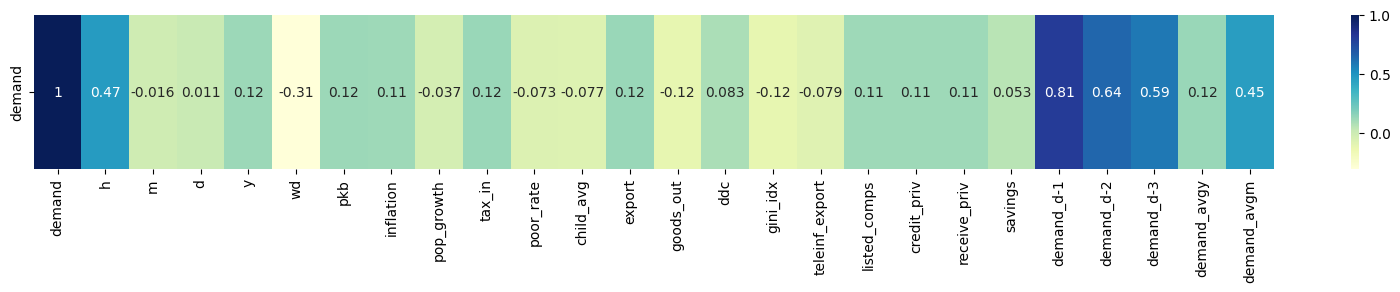

In [43]:
corr = df_train2.corr(numeric_only=True)
plt.figure(figsize=(20,2))
hm = sns.heatmap(pd.DataFrame(corr.iloc[0,:]).T, cmap="YlGnBu", annot=True)

plt.show(hm)

In [44]:
print(pkbcol)

Index(['Rok', 'PKB [miliard. USD]', 'Stopa inflacji',
       'Tempo wzrostu liczby ludności', 'Wpływy podatkowe [%pkb]',
       'Wskaźnik liczby ludzi ubogich na krajowym progu ubóstwa [%]',
       'Średnia liczba dzieci na kobietę', 'Eksport',
       'Wydatki PKB %-Saldo zewn. Towarów i usług',
       'Wsp.  Zależnośći demograficznej', 'Wskaźnik Giniego',
       'Artykuły prasowe naukowe i techniczne [tys. szt]',
       'Eksport towarów teleifnormatycznych jako % całkowitego eksportu',
       'Krajowe spółki giełdowe łącznie',
       'Kredyt krajowy udzielony dla sektora prywatnego (% PKB)',
       'Należności od sektora prywatnego (roczny wzrost jako % podaży pieniądza)',
       'Oszczędności (% PKB)'],
      dtype='object')


# Save


In [46]:
df.to_csv('processed.csv')